In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
class Value:

    """
    Initialize data
    - persist expression graph with _children
    """
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0 # default, 0 as it wouldn't affect output (Loss function - L). 

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, another):
        return Value(self.data + another.data, (self, another), '+')

    def __mul__(self, another):
        return Value(self.data * another.data, (self, another), '*')


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
print(f"d: {d}")
print(f"d with op: {(a.__mul__(b)).__add__(c)}")
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

d: Value(data=4.0)
d with op: Value(data=4.0)


Value(data=-8.0)

In [37]:
d._prev, d._op

({Value(data=-6.0), Value(data=10.0)}, '+')

In [38]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [39]:
# Graph Viz

In [40]:
from graphviz import Digraph

def trace(root):

    # Builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges



def draw_dot(root):
    dot = Digraph(
        format='svg',
        graph_attr={'rankdir': 'LR'}
    )

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))

        dot.node(name=uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)


    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot 


        

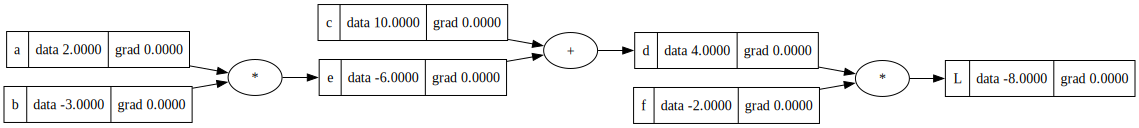

In [41]:
draw_dot(L)

In [42]:

def lol():
    """
    Gating function so that it doesn't pollute the global scope. 
    """
    
    a = Value(2.0, label='a') 
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = c + e; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data


    h = 0.0001  # Nudge one of the values by a small amount h, and compute slope/gradient


    a = Value(2.0, label='a') # + h => Derivative w.r.t to a: dL/da = 6
    b = Value(-3.0, label='b') # + h => Derivative w.r.t to b: dL/db = -4
    c = Value(10.0, label='c') # + h => Derivative w.r.t to c: dL/dc = -2
    e = a * b ; e.label = 'e' # + Value(h) => Derivative w.r.t to d: dL/de = -2
    d = e + c ; d.label = 'd' # + Value(h) => Derivative w.r.t to d dL/dd = -2
    f = Value(-2.0, label='f') # + h => Derivative w.r.t to f dL/df = 4
    L = d * f; L.label = 'L'
    L2 = L.data  # + h => Derivative w.r.t. to itself is 1. 

    slope = (L2 - L1) / h 
    print(f"Slope: {slope}")

lol()

Slope: 0.0


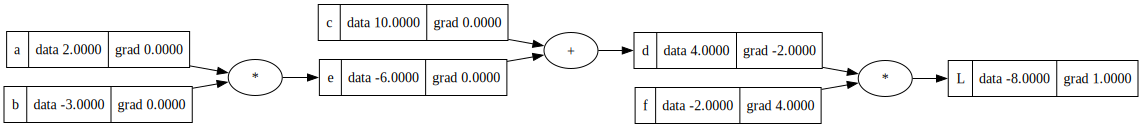

In [43]:
L.grad = 1
f.grad = 4
d.grad = -2 
# Redraw by invoking draw_dot(L)
draw_dot(L)

### Now let's anaylyse dL/dc . How change in 'c' affects 'L'
 
#### dL/dc = dL/dd * dd/dc  (Chain Rule)




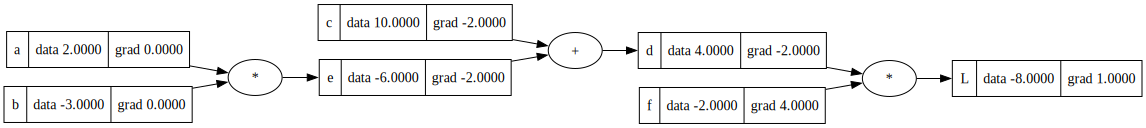

In [44]:
c.grad = -2 
e.grad = -2 
# Redraw
draw_dot(L)

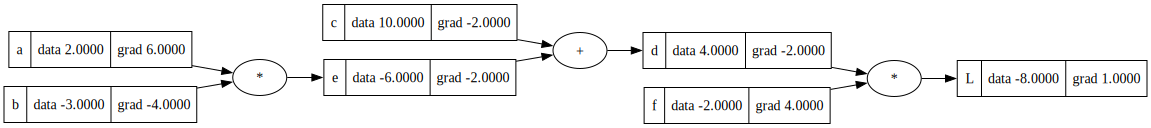

In [45]:
a.grad = 6
b.grad = -4 
draw_dot(L)

In [46]:
# Can be verified by incrementing 'h' in the lol() function

So, We constantly multiply the derivative with the local derivative to get the gradient. that's what backprop is : Recursive application of chain rule. 

In [47]:


# Then lets run the forward pass

def step_increment():
    
    # Let's increment the data by adding SMALL STEP
    incr = 0.01
    a.data += a.grad * incr
    b.data += b.grad * incr
    c.data += c.grad * incr
    f.data += f.grad * incr

    # Run the FORWARD PASS 
    e = a * b 
    d = c + e
    L = d * f
    
    print(L.data)



In [48]:
# Now the output should increase in a positive direction. (so less negative here..)
step_increment()

-7.286496
